## `Exploratory Data Analysis (EDA) project`
### `Lending Club Case Study`
Lending Club is suferring from Default. It has now decided to find out what features/attributes of their customer (data) influence the Default probability. 
We are to perform an Exploratory Data Analysis to find that. 

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore") 

### `Import the .csv file into a Pandas DataFrame`

In [6]:
# Import the csv file containing input - Loan data

loan_work = pd.read_csv(('D:\Technocolabs Internship\Task 2\Demystifying-Risk-of-Lending-Club-main\Demystifying-Risk-of-Lending-Club-main\lending_club_loans.csv'), encoding ="ISO-8859-1")
loan = loan_work.copy(deep=True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,0.0933,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,0.0838,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `Drop Unnecessary Features`

In [9]:
# Clean Unnecessary Fields

loan = loan.drop([
'acc_now_delinq'
,'acc_open_past_24mths'
,'all_util'
,'annual_inc_joint'
,'application_type'
,'avg_cur_bal'
,'bc_open_to_buy'
,'bc_util'
,'chargeoff_within_12_mths'
,'collection_recovery_fee'
,'collections_12_mths_ex_med'
,'delinq_2yrs'
,'delinq_amnt'
,'desc'
,'dti_joint'
,'earliest_cr_line'
,'home_ownership'
,'id'
,'il_util'
,'initial_list_status'
,'inq_fi'
,'inq_last_12m'
,'max_bal_bc'
,'member_id'
,'mo_sin_old_il_acct'
,'mo_sin_old_rev_tl_op'
,'mo_sin_rcnt_rev_tl_op'
,'mo_sin_rcnt_tl'
,'mort_acc'
,'mths_since_last_delinq'
,'mths_since_last_major_derog'
,'mths_since_last_record'
,'mths_since_rcnt_il'
,'mths_since_recent_bc'
,'mths_since_recent_bc_dlq'
,'mths_since_recent_inq'
,'mths_since_recent_revol_delinq'
,'num_accts_ever_120_pd'
,'num_actv_bc_tl'
,'num_actv_rev_tl'
,'num_bc_sats'
,'num_bc_tl'
,'num_il_tl'
,'num_op_rev_tl'
,'num_rev_accts'
,'num_rev_tl_bal_gt_0'
,'num_sats'
,'num_tl_120dpd_2m'
,'num_tl_30dpd'
,'num_tl_90g_dpd_24m'
,'num_tl_op_past_12m'
,'open_acc_6m'
,'open_il_12m'
,'open_il_24m'
,'open_il_6m'
,'open_rv_12m'
,'open_rv_24m'
,'out_prncp'
,'out_prncp_inv'
,'pct_tl_nvr_dlq'
,'percent_bc_gt_75'
,'policy_code'
,'pymnt_plan'
,'recoveries'
,'tax_liens'
,'title'
,'tot_coll_amt'
,'tot_cur_bal'
,'tot_hi_cred_lim'
,'total_bal_ex_mort'
,'total_bal_il'
,'total_bc_limit'
,'total_cu_tl'
,'next_pymnt_d'
,'total_il_high_credit_limit'
,'total_pymnt'
,'total_pymnt_inv'
,'total_rec_int'
,'total_rec_late_fee'
,'total_rec_prncp'
,'verification_status_joint'
,'total_rev_hi_lim'
,'last_pymnt_amnt'
,'last_credit_pull_d'
,'url'], axis=1)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,...,1.0,3.0,0.0,13648.0,0.837,9.0,2015-01,744.0,740.0,0.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,...,5.0,3.0,0.0,1687.0,0.094,4.0,2013-04,499.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,...,2.0,2.0,0.0,2956.0,0.985,10.0,2014-06,719.0,715.0,0.0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1.0,10.0,0.0,5598.0,0.210,37.0,2015-01,604.0,600.0,0.0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,...,0.0,15.0,0.0,27783.0,0.539,38.0,2016-09,694.0,690.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,0.0933,80.69,B,B3,NaN,< 1 year,...,NaN,NaN,NaN,0.0,NaN,NaN,2010-06,714.0,710.0,NaN
42534,6500.0,6500.0,0.0,36 months,0.0838,204.84,A,A5,NaN,< 1 year,...,NaN,NaN,NaN,0.0,NaN,NaN,2010-06,724.0,720.0,NaN
42535,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,Homemaker,10+ years,...,NaN,NaN,NaN,0.0,NaN,NaN,2010-06,794.0,790.0,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `Transform a Text Label into Numeric using Apply-Lambda Function`

In [12]:
# Create new column "Defaulted" with Value 1 if Loan Status is Charged Off, otherwise 0  

loan['defaulted'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [14]:
# Get a Statisctical picture on the Numerical Data

loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,defaulted
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42535.000000,42535.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42445.000000,42506.000000,42535.000000,42535.000000,41170.000000,42538.000000
mean,11089.722581,10821.585753,10139.830603,0.121650,322.623063,6.913656e+04,13.373043,713.052545,717.052545,1.081424,9.343951,0.058156,1.429786e+04,0.491172,22.124406,689.305302,676.382744,0.045227,0.132893
std,7410.938391,7146.914675,7131.686447,0.037079,208.927216,6.409635e+04,6.726315,36.188439,36.188439,1.527455,4.496274,0.245713,2.201844e+04,0.283643,11.592811,80.202882,119.011555,0.208737,0.339463
min,500.000000,500.000000,0.000000,0.054200,15.670000,1.896000e+03,0.000000,610.000000,614.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,0.096300,165.520000,4.000000e+04,8.200000,685.000000,689.000000,0.000000,6.000000,0.000000,3.635000e+03,0.257000,13.000000,644.000000,640.000000,0.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,0.119900,277.690000,5.900000e+04,13.470000,710.000000,714.000000,1.000000,9.000000,0.000000,8.821000e+03,0.497000,20.000000,699.000000,695.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,0.147200,428.180000,8.250000e+04,18.680000,740.000000,744.000000,2.000000,12.000000,0.000000,1.725100e+04,0.727000,29.000000,744.000000,740.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,825.000000,829.000000,33.000000,47.000000,5.000000,1.207359e+06,1.190000,90.000000,850.000000,845.000000,2.000000,1.000000


In [16]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'last_pymnt_d', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

In [18]:
# Get a glimpse of the type of individual fields

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   funded_amnt           42535 non-null  float64
 2   funded_amnt_inv       42535 non-null  float64
 3   term                  42535 non-null  object 
 4   int_rate              42535 non-null  float64
 5   installment           42535 non-null  float64
 6   grade                 42535 non-null  object 
 7   sub_grade             42535 non-null  object 
 8   emp_title             39909 non-null  object 
 9   emp_length            41423 non-null  object 
 10  annual_inc            42531 non-null  float64
 11  verification_status   42535 non-null  object 
 12  issue_d               42535 non-null  object 
 13  loan_status           42535 non-null  object 
 14  purpose               42535 non-null  object 
 15  zip_code           

## `Univariate Analysis - EDA`

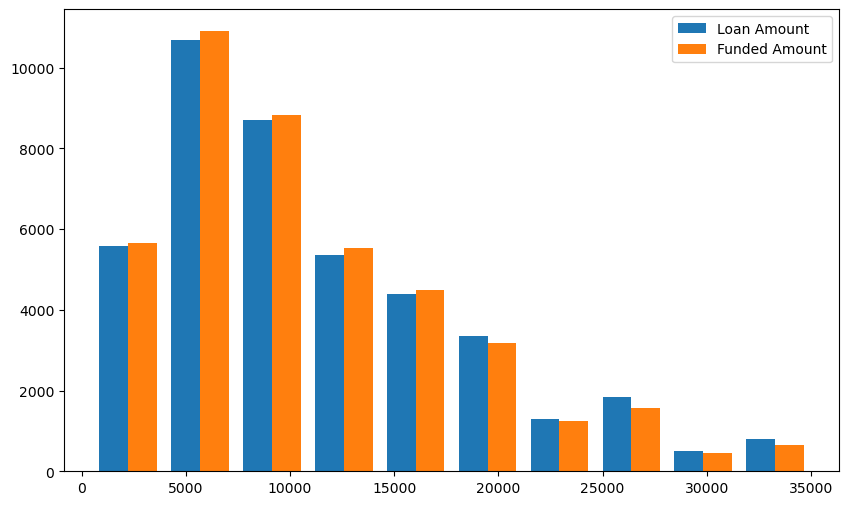

In [21]:
# Check distribution of Loan amounts and Funded Amounts

ax = plt.subplots(figsize=(10, 6))
plt.hist([loan.loan_amnt, loan.funded_amnt], label=['Loan Amount', 'Funded Amount'])
plt.legend()

<Axes: >

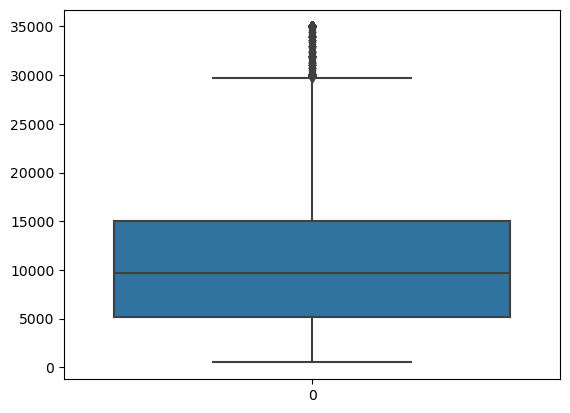

In [23]:
# Check the Distribution of Annual Incomes of Loan Takers

sns.boxplot(loan.loan_amnt)

In [25]:
# Boxplot with Annual Income - Split between Defaulted and Non-Defaulted

plt.style.use('seaborn')
ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan)
ax.set_xlabel('Defaulted? (0=No/1=Yes)', fontsize=14) 
ax.set_ylabel('Annual Income', fontsize=14)

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
print("25, 50, 75, 100 Quartiles of Annual Income:", loan.quantile(q=0.25).annual_inc, loan.quantile(q=0.50).annual_inc, loan.quantile(q=0.75).annual_inc, loan.quantile(q=1).annual_inc)
print("Median of Annual Income: ", loan.annual_inc.median())

In [28]:
# Extract records with top 99% of Annual Income as max and plot again (this is remove ouliers)

total = int(round(loan.annual_inc.count()*99/100))
loan_temp = pd.DataFrame({'defaulted': loan.defaulted, 'annual_inc': loan.annual_inc})
loan_temp = loan_temp.sort_values('annual_inc')
loan_temp = loan_temp.head(total)
loan_temp

,defaulted,annual_inc
42438,0,1896.0
42363,0,2000.0
41825,0,3300.0
42091,0,3500.0
41910,0,3600.0
...,...,...
29250,0,240734.0
33276,0,241875.0
29726,1,242004.0
16058,0,242400.0


Text(0, 0.5, 'Annual Income')

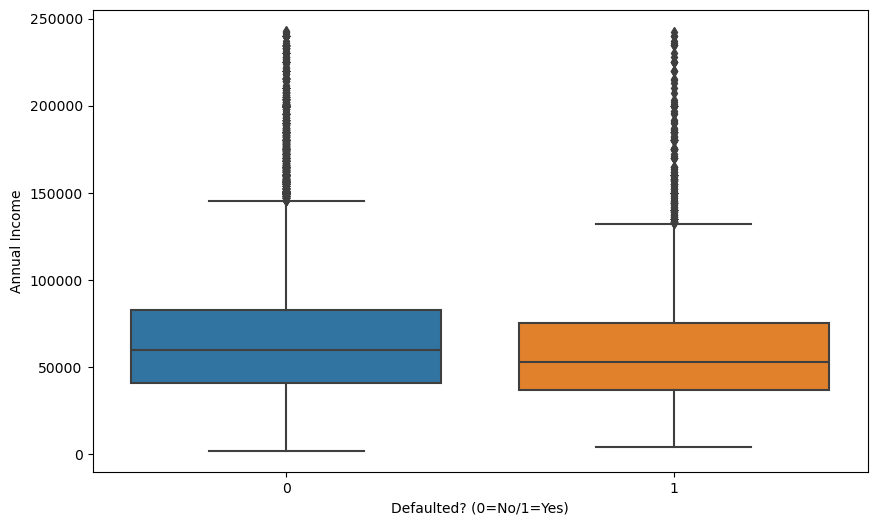

In [30]:
# Boxplot with Annual Income
ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan_temp)
ax.set_xlabel('Defaulted? (0=No/1=Yes)') 
ax.set_ylabel('Annual Income')

# Doesn't appear that there is any correlation between Annual Income and default ratio

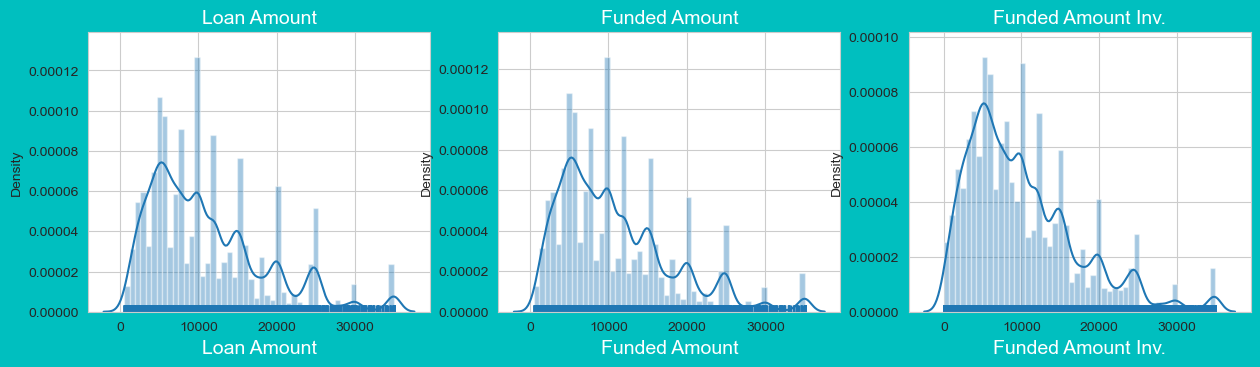

In [32]:
# Compare distribution of the three Loan Amount Fields  

plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv.',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# Most loans concentrated between $50K to $120K

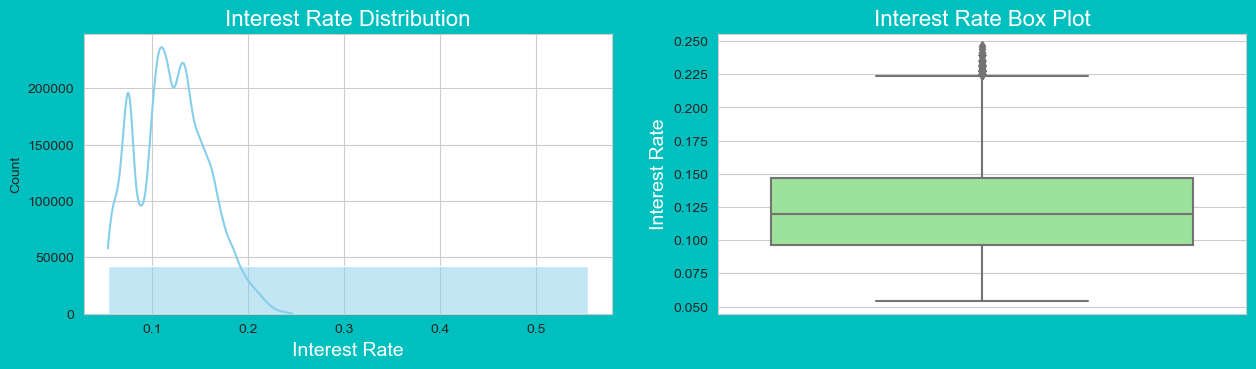

In [38]:
# Ensure the 'int_rate' column is treated as a string
loan['int_rate'] = loan['int_rate'].astype(str)

# Create a Numeric field with the numeric value from interest rate
loan['int_rate_num'] = loan['int_rate'].str.rstrip('%').astype(float)

# Set up the plotting environment
plt.figure(figsize=(15,8), facecolor='c')
sns.set_style("whitegrid")

# Subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(loan['int_rate_num'], kde=True, color='skyblue', binwidth=0.5)
ax.set_title('Interest Rate Distribution', fontsize=16, color='w')
ax.set_xlabel('Interest Rate', fontsize=14, color='w')

# Subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate_num'], color='lightgreen')
ax.set_title('Interest Rate Box Plot', fontsize=16, color='w')
ax.set_ylabel('Interest Rate', fontsize=14, color='w')

plt.show()


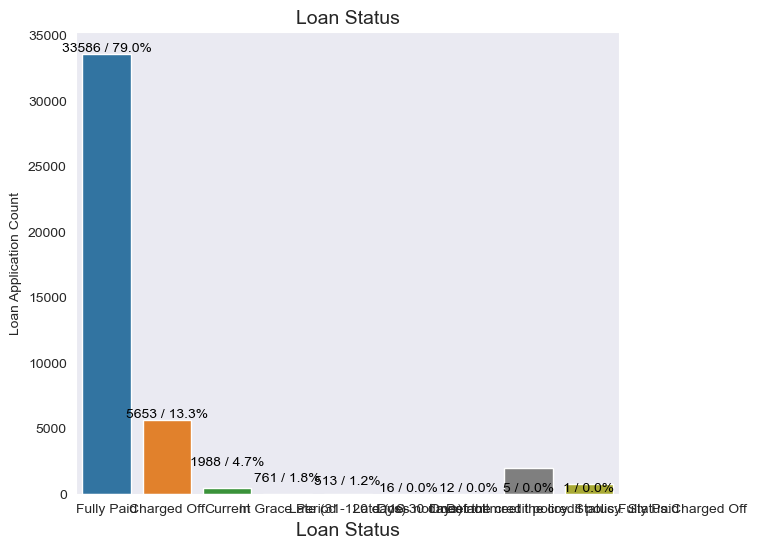

In [44]:
plt.figure(figsize=(7,6))
sns.set_style("dark")
ax = sns.countplot(x="loan_status", data=loan)
ax.set_title('Loan Status', fontsize=14)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Loan Application Count')      

# To show count of values above bars
s = loan['loan_status'].value_counts()
tot = s.sum()
for i, (status, count) in enumerate(s.items()):
    txt = f"{count} / {round(count/tot*100, 1)}%"
    ax.text(i, count + 200, txt, color='k', ha='center')

plt.show()


## `Multi-variate Analysis - EDA`

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_pymnt_d             object
last_fico_range_high    float64
last_fico_range_low     float64
pub_rec_bankruptcies    float64
defaulted                 int64
int_rate

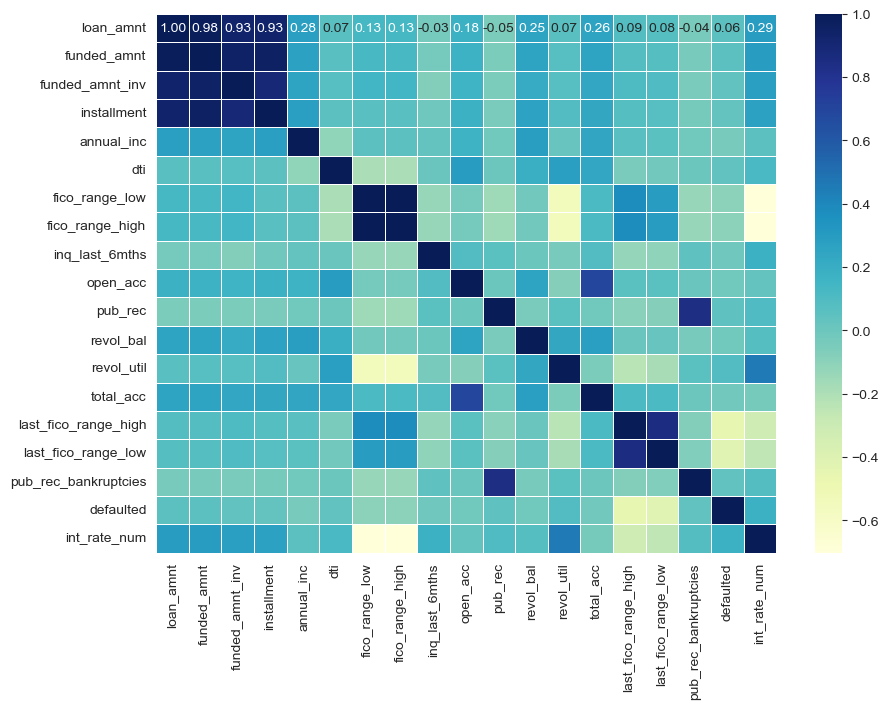

In [51]:
# Check the data types of each column
print(loan.dtypes)
# Drop non-numeric columns from the correlation matrix
numeric_loan = loan.select_dtypes(include=['number'])

# If conversion is needed for certain columns
# Example: Convert 'term' to numeric if it's a string like '36 months'
# loan['term'] = loan['term'].str.replace(' months', '').astype(int)

# Compute correlation matrix
correlation_matrix = numeric_loan.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, ax=ax)
plt.show()


In [53]:
# Find out the number of Null values in invididual columns in the data

loan.isna().sum()

loan_amnt                  3
funded_amnt                3
funded_amnt_inv            3
term                       3
int_rate                   0
installment                3
grade                      3
sub_grade                  3
emp_title               2629
emp_length              1115
annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
purpose                    3
zip_code                   3
addr_state                 3
dti                        3
fico_range_low             3
fico_range_high            3
inq_last_6mths            32
open_acc                  32
pub_rec                   32
revol_bal                  3
revol_util                93
total_acc                 32
last_pymnt_d              86
last_fico_range_high       3
last_fico_range_low        3
pub_rec_bankruptcies    1368
defaulted                  0
int_rate_num               3
dtype: int64

In [55]:
# Find out which fields with high percentage of null values

a = (loan.isnull().sum() / loan.shape[0]) * 100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'], ascending=False)

,Percentage of null values
emp_title,6.180356
pub_rec_bankruptcies,3.215948
emp_length,2.621186
revol_util,0.218628
last_pymnt_d,0.202172
inq_last_6mths,0.075227
open_acc,0.075227
pub_rec,0.075227
total_acc,0.075227


### `Unique values in each categorical feature`

In [58]:
# Get a Count of Unique Values across Non Numeric Variables

for i in loan.columns[loan.dtypes == 'object']:
    print(loan[i].value_counts())
    print('--------------------------------')

term
 36 months    31534
 60 months    11001
Name: count, dtype: int64
--------------------------------
int_rate
0.1099    970
0.1149    837
0.1349    832
0.0751    787
0.0788    742
         ... 
0.244       1
0.2148      1
0.1741      1
0.2264      1
0.1744      1
Name: count, Length: 395, dtype: int64
--------------------------------
grade
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: count, dtype: int64
--------------------------------
sub_grade
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: count, dtype: int64
--------------------------------
emp_title
US Army                             139
Bank of America

### `Feature Exgineering - introduce a Bin-based categorical Feature`

In [61]:
# Count the Numbers of Defaulted vs non-Defaulted in various income brackets (bins)

# Apply Binning on Annual Income ['0-30000, 30000-60000, 60000-100000, 100000+]

loan_temp['anninc_bin'] = 'NB'
loan_temp['annual_inc'] = loan_temp['annual_inc'].astype(int)

def bininc(incparam):
    if incparam >= 0 and incparam < 30000:
        return '0-30K'
    elif incparam >= 30000 and incparam < 60000:
        return '30-60K'
    elif incparam >= 60000 and incparam < 100000:
        return '60-100K'
    elif incparam >= 100000:
        return '100K+'

loan_temp['anninc_bin'] = loan.annual_inc.apply(bininc) 


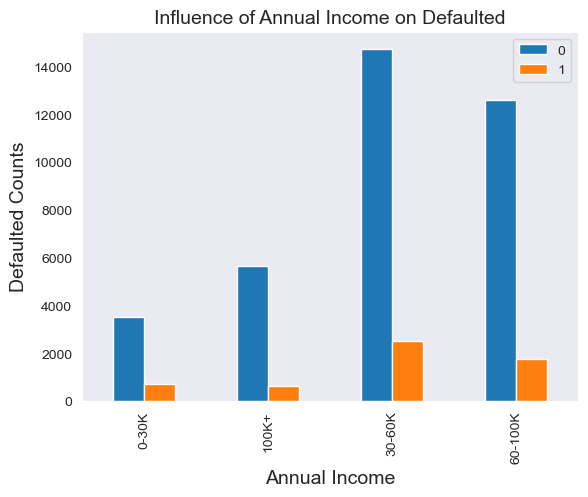

In [63]:
# Correlation between Annual Income and Defaulted after Binning Annual Income

pd.crosstab(loan_temp.anninc_bin,loan_temp.defaulted).plot(kind='bar')
plt.title('Influence of Annual Income on Defaulted', fontsize=14)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.legend()

[Text(0, 0, '0-30K'),
 Text(1, 0, '100K+'),
 Text(2, 0, '30-60K'),
 Text(3, 0, '60-100K')]

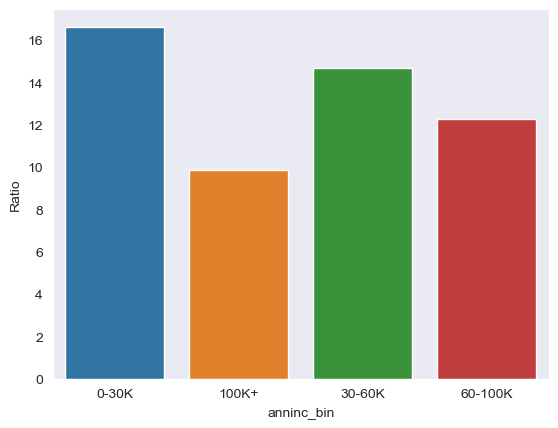

In [65]:
# Plot Annual_income brackets and Ratio of Default in these brackets

df_anninc = loan_temp[loan_temp.defaulted == 1].groupby(['anninc_bin']).defaulted.count().reset_index()
df_aninctot = loan_temp.groupby(['anninc_bin'])[['defaulted']].count().reset_index()
df_anincfull = pd.merge(df_anninc, df_aninctot, left_on='anninc_bin', right_on='anninc_bin', how='left')
df_anincfull['Ratio'] = df_anincfull.defaulted_x/df_anincfull.defaulted_y*100
ax = sns.barplot(x=df_anincfull.anninc_bin, y=df_anincfull.Ratio)
ax.set_xticklabels(df_anincfull.anninc_bin)

# Observation: The default ratio of borrowers in the Income bracket of 0-30K is high. 

In [67]:
df_anincfull

,anninc_bin,defaulted_x,defaulted_y,Ratio
0,0-30K,700,4209,16.631029
1,100K+,617,6266,9.846792
2,30-60K,2537,17262,14.697022
3,60-100K,1764,14369,12.276428


In [69]:
# Apply Binning on funded amount ['0-10K', '10-20K', '20K+'']

loan['famnt'] = 0
loan['funded_amnt'] = loan['funded_amnt'].astype(int)
def binfamt(dfamt): 
    if dfamt >= 0 and dfamt < 10000:
        return '0-10K'
    elif dfamt >= 10000 and dfamt < 20000:
        return '10-20K'
    elif dfamt >= 20000:
        return '20K+'

loan['famnt'] = loan.funded_amnt.apply(binfamt) 
loan['famnt']

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [75]:
# Check for missing or infinite values
print(loan['funded_amnt'].isnull().sum())  # Number of NaN values
print(loan['funded_amnt'].isna().sum())    # Number of NA values
print((loan['funded_amnt'] == float('inf')).sum())  # Number of positive infinity values
print((loan['funded_amnt'] == float('-inf')).sum())  # Number of negative infinity values
loan['funded_amnt'].fillna(0, inplace=True)  # Example: Fill missing values with 0
loan = loan[loan['funded_amnt'].notna()]
loan = loan[~(loan['funded_amnt'] == float('inf'))]
loan = loan[~(loan['funded_amnt'] == float('-inf'))]
loan['funded_amnt'] = loan['funded_amnt'].astype(int)
def binfamt(dfamt):
    if dfamt >= 0 and dfamt < 10000:
        return '0-10K'
    elif dfamt >= 10000 and dfamt < 20000:
        return '10-20K'
    elif dfamt >= 20000:
        return '20K+'

loan['famnt'] = loan['funded_amnt'].apply(binfamt)


0
0
0
0


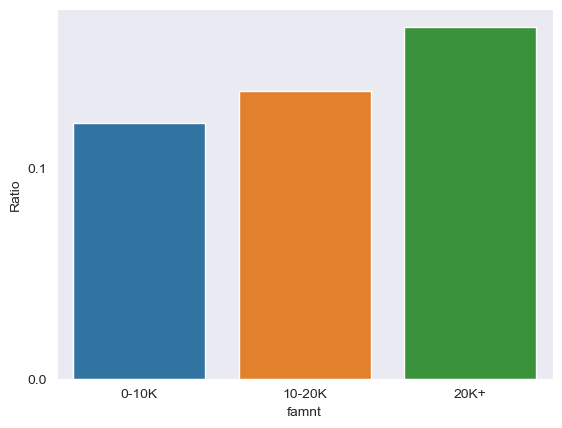

In [77]:
# Plot against Ratio of Default and Funded Amount

dtidef = loan[loan.defaulted == 1].groupby(['famnt'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['famnt'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='famnt', right_on='famnt', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y
dtifull
ax = sns.barplot(x=dtifull.famnt, y=dtifull.Ratio)
sns.set(font_scale = 5)

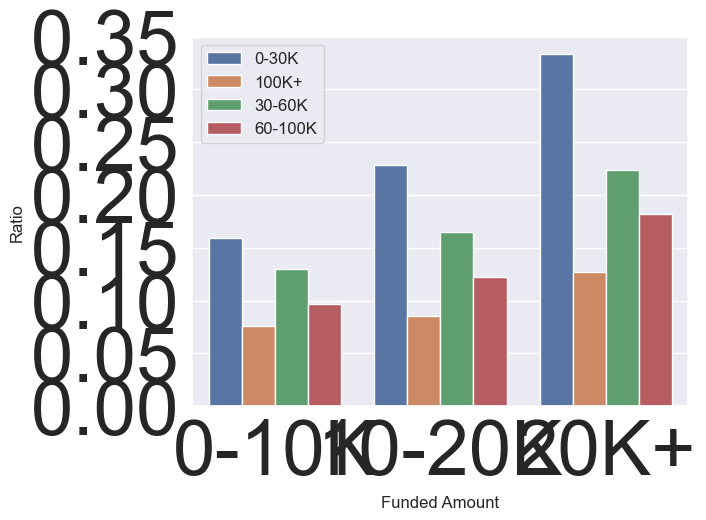

In [79]:
# Create a combination of Funded Amount and Annual Income and find Infleunce of this Combination on Default
# famnt - is the field in Loan DF that has bin tags on Funded Amount
# anninc_bin - is the field in Loan DF that has bin tags on Annual Income

def bininc(incparam):
    if incparam >= 0 and incparam < 30000:
        return '0-30K'
    elif incparam >= 30000 and incparam < 60000:
        return '30-60K'
    elif incparam >= 60000 and incparam < 100000:
        return '60-100K'
    elif incparam >= 100000:
        return '100K+'  
    
loan['anninc_bin'] = loan.annual_inc.apply(bininc)

fmnt_ainc = loan[loan.defaulted == 1].groupby(['famnt', 'anninc_bin'])[['defaulted']].count().reset_index()

df_fa = loan.groupby(['famnt', 'anninc_bin'])[['defaulted']].count().reset_index()

fafull = pd.merge(fmnt_ainc, df_fa, left_on=['famnt', 'anninc_bin'], right_on=['famnt', 'anninc_bin'], how='left')
fafull['Ratio'] = fafull.defaulted_x/fafull.defaulted_y
fafull

ax = sns.barplot(x="famnt", hue="anninc_bin", y="Ratio", data=fafull)

plt.xlabel('Funded Amount', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: For the Funded Amount Bracket of 20K+, there is an exceptionally high ratio of 50% for borrowers
# in the income bracket of 0-30K. However, exaination of the data reveals that that was only 1 default 
# out of 2 borrower in that category.

In [81]:
fafull

,famnt,anninc_bin,defaulted_x,defaulted_y,Ratio
0,0-10K,0-30K,604,3790,0.159367
1,0-10K,100K+,138,1814,0.076075
2,0-10K,30-60K,1336,10307,0.129621
3,0-10K,60-100K,571,5911,0.096600
4,10-20K,0-30K,95,416,0.228365
5,10-20K,100K+,218,2555,0.085323
6,10-20K,30-60K,1004,6073,0.165322
7,10-20K,60-100K,710,5806,0.122287
8,20K+,0-30K,1,3,0.333333
9,20K+,100K+,296,2322,0.127476


In [83]:
# Compare Means of Fields between Defaulted 1 and 0
loan.groupby('defaulted').mean().round()

TypeError: agg function failed [how->mean,dtype->object]

In [86]:
# Identify and exclude non-numeric columns
non_numeric_columns = loan.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Select only numeric columns
numeric_columns = loan.select_dtypes(include=['number']).columns
loan_numeric = loan[numeric_columns]

# Group by 'defaulted' and compute mean
means = loan_numeric.groupby(loan['defaulted']).mean().round()
print(means)


Non-numeric columns: Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'last_pymnt_d', 'famnt', 'anninc_bin'],
      dtype='object')
           loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc  \
defaulted                                                                     
0            10930.0      10674.0          10024.0        320.0     70157.0   
1            12134.0      11781.0          10895.0        337.0     62483.0   

            dti  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
defaulted                                                                    
0          13.0           714.0            718.0             1.0       9.0   
1          14.0           704.0            708.0             1.0       9.0   

           pub_rec  revol_bal  revol_util  total_acc  last_fico_range_high  \
defaulted                        

In [88]:
# Is there any significant difference between Requested Loan Amount and Funded/Disbursed Amount - 
# calculated in percentages

print(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt).sort_values(ascending=False).head(10))
print(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt).sort_values(ascending=False).tail(10))

23623    0.898750
23363    0.897500
23355    0.889286
23483    0.867500
23404    0.847500
38909    0.845313
23416    0.841071
36963    0.841000
36966    0.830556
38800    0.817000
dtype: float64
14463    0.0
14464    0.0
14465    0.0
14466    0.0
14467    0.0
14468    0.0
42535    0.0
39786    NaN
42536    NaN
42537    NaN
dtype: float64


### `Find correlation between Default status and Grade/Sub-Grades of Loans`

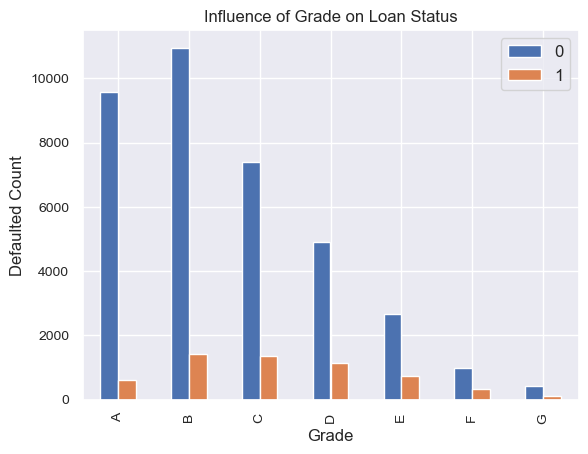

In [91]:
# Correlation between Grade of Loan and Defaulted

ct = pd.crosstab(loan.grade,loan.defaulted)
ct.plot(kind='bar')
plt.title('Influence of Grade on Loan Status', fontsize=12)

plt.xlabel('Grade', fontsize=12)
plt.ylabel('Defaulted Count', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: The default ratio is fairly proportional to the total in each Grade. 
# None of the individual grades stand out as exception in default ratio. 

In [93]:
ct['ratio'] = (ct[1]/ct[0]*100).round(2)
ct

defaulted,0,1,ratio
grade,,,
A,9581,602,6.28
B,10959,1430,13.05
C,7387,1353,18.32
D,4890,1126,23.03
E,2674,720,26.93
F,980,321,32.76
G,411,101,24.57


In [95]:
# Observation: Grade G, F, E, D have very high Default ratio

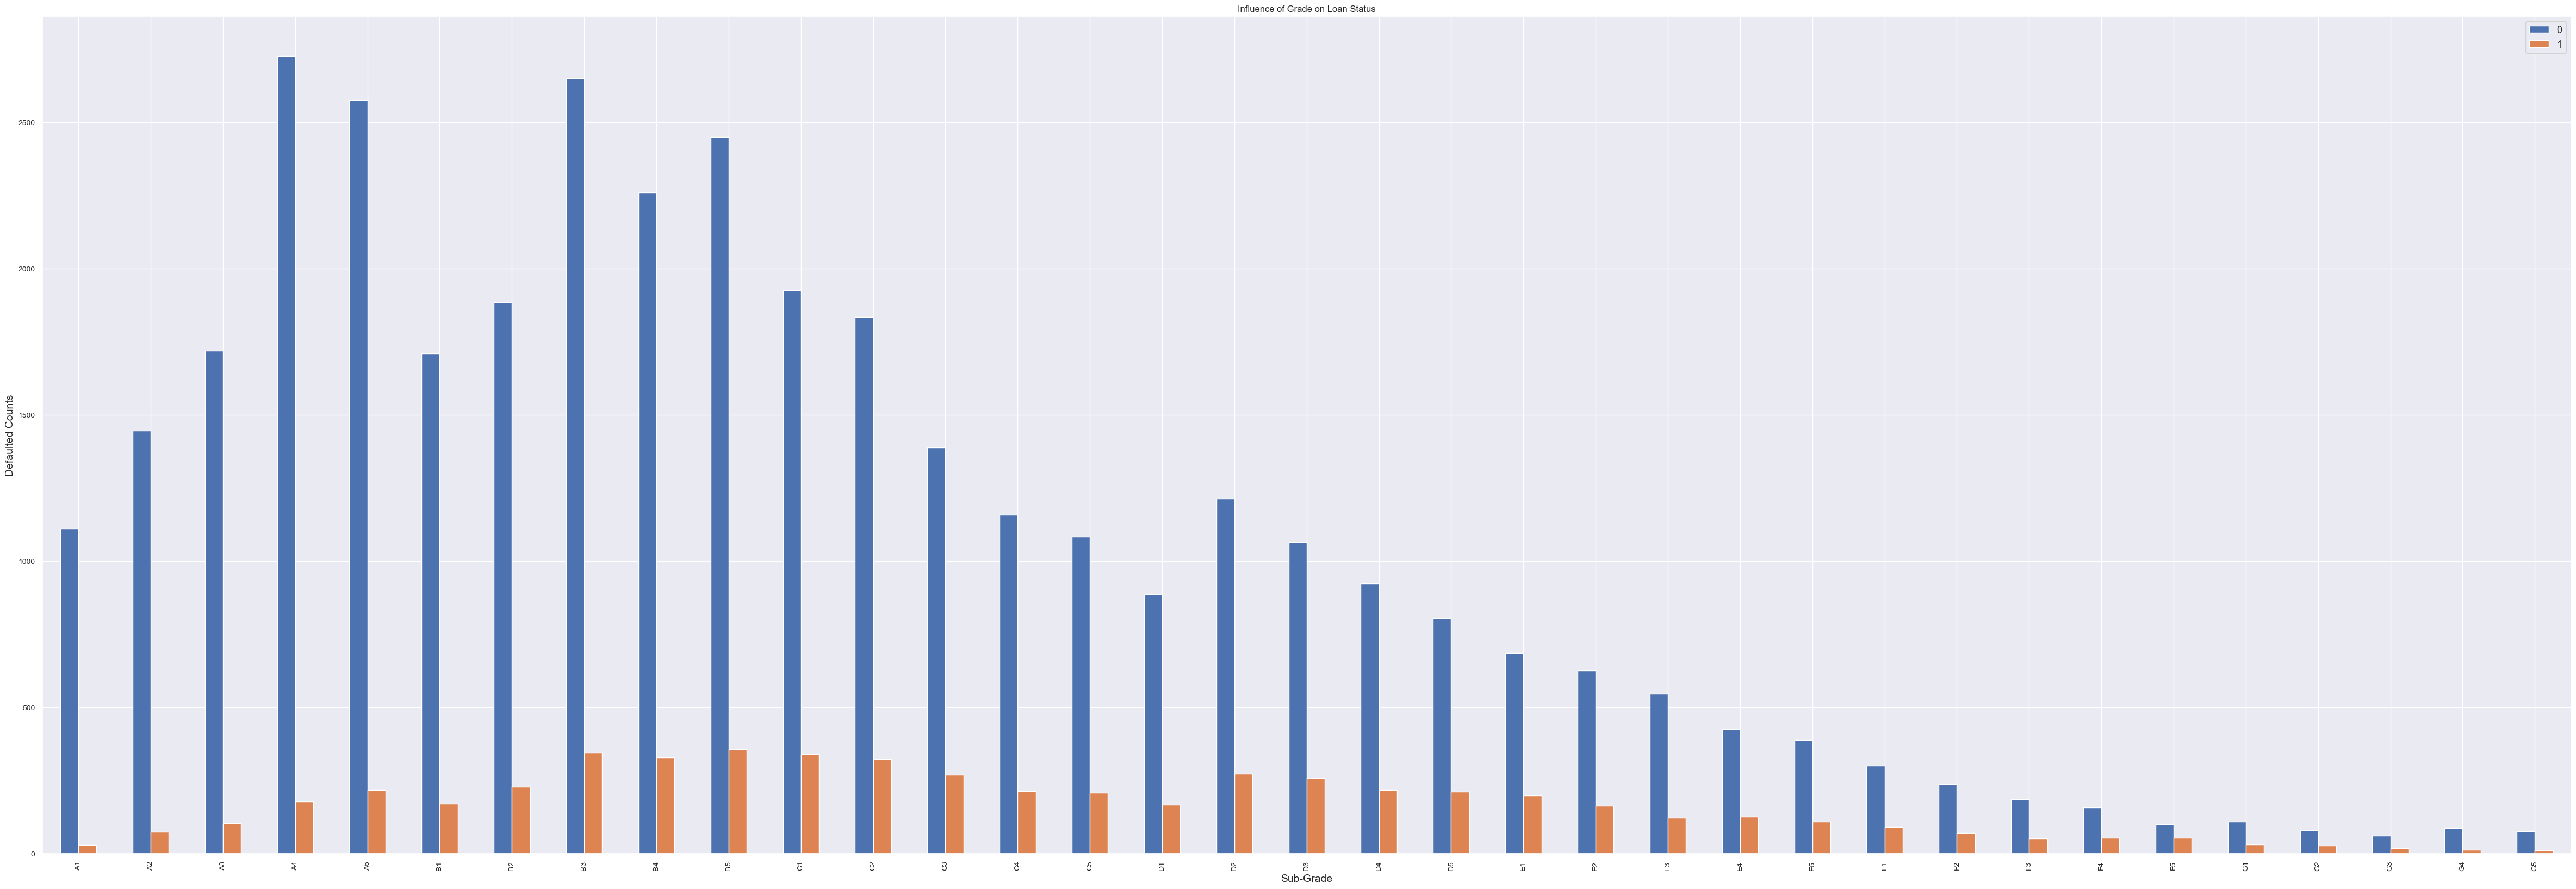

In [97]:
# Correlation between Sub-Grade of Loan and Defaulted

ct = pd.crosstab(loan.sub_grade,loan.defaulted)
ct.plot(kind='bar', figsize=(60,20))
plt.title('Influence of Grade on Loan Status', fontsize=12)
plt.xlabel('Sub-Grade', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.legend(fontsize=13)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

# Observation: The default ratio is fairly proportional to the total in each Grade. 
# None of the individual grades stand out as exception in default ratio. 

In [99]:
ct['ratio'] = (ct[1]/ct[0]*100).round(2)
ct

defaulted,0,1,ratio
sub_grade,,,
A1,1112,30,2.70
A2,1446,74,5.12
A3,1720,103,5.99
A4,2727,178,6.53
A5,2576,217,8.42
B1,1711,171,9.99
B2,1885,228,12.10
B3,2651,346,13.05
B4,2261,329,14.55


In [101]:
# Observations: Some of the Sub-grade of Loans have very high Default rate

### `Find correlation between Default and State`

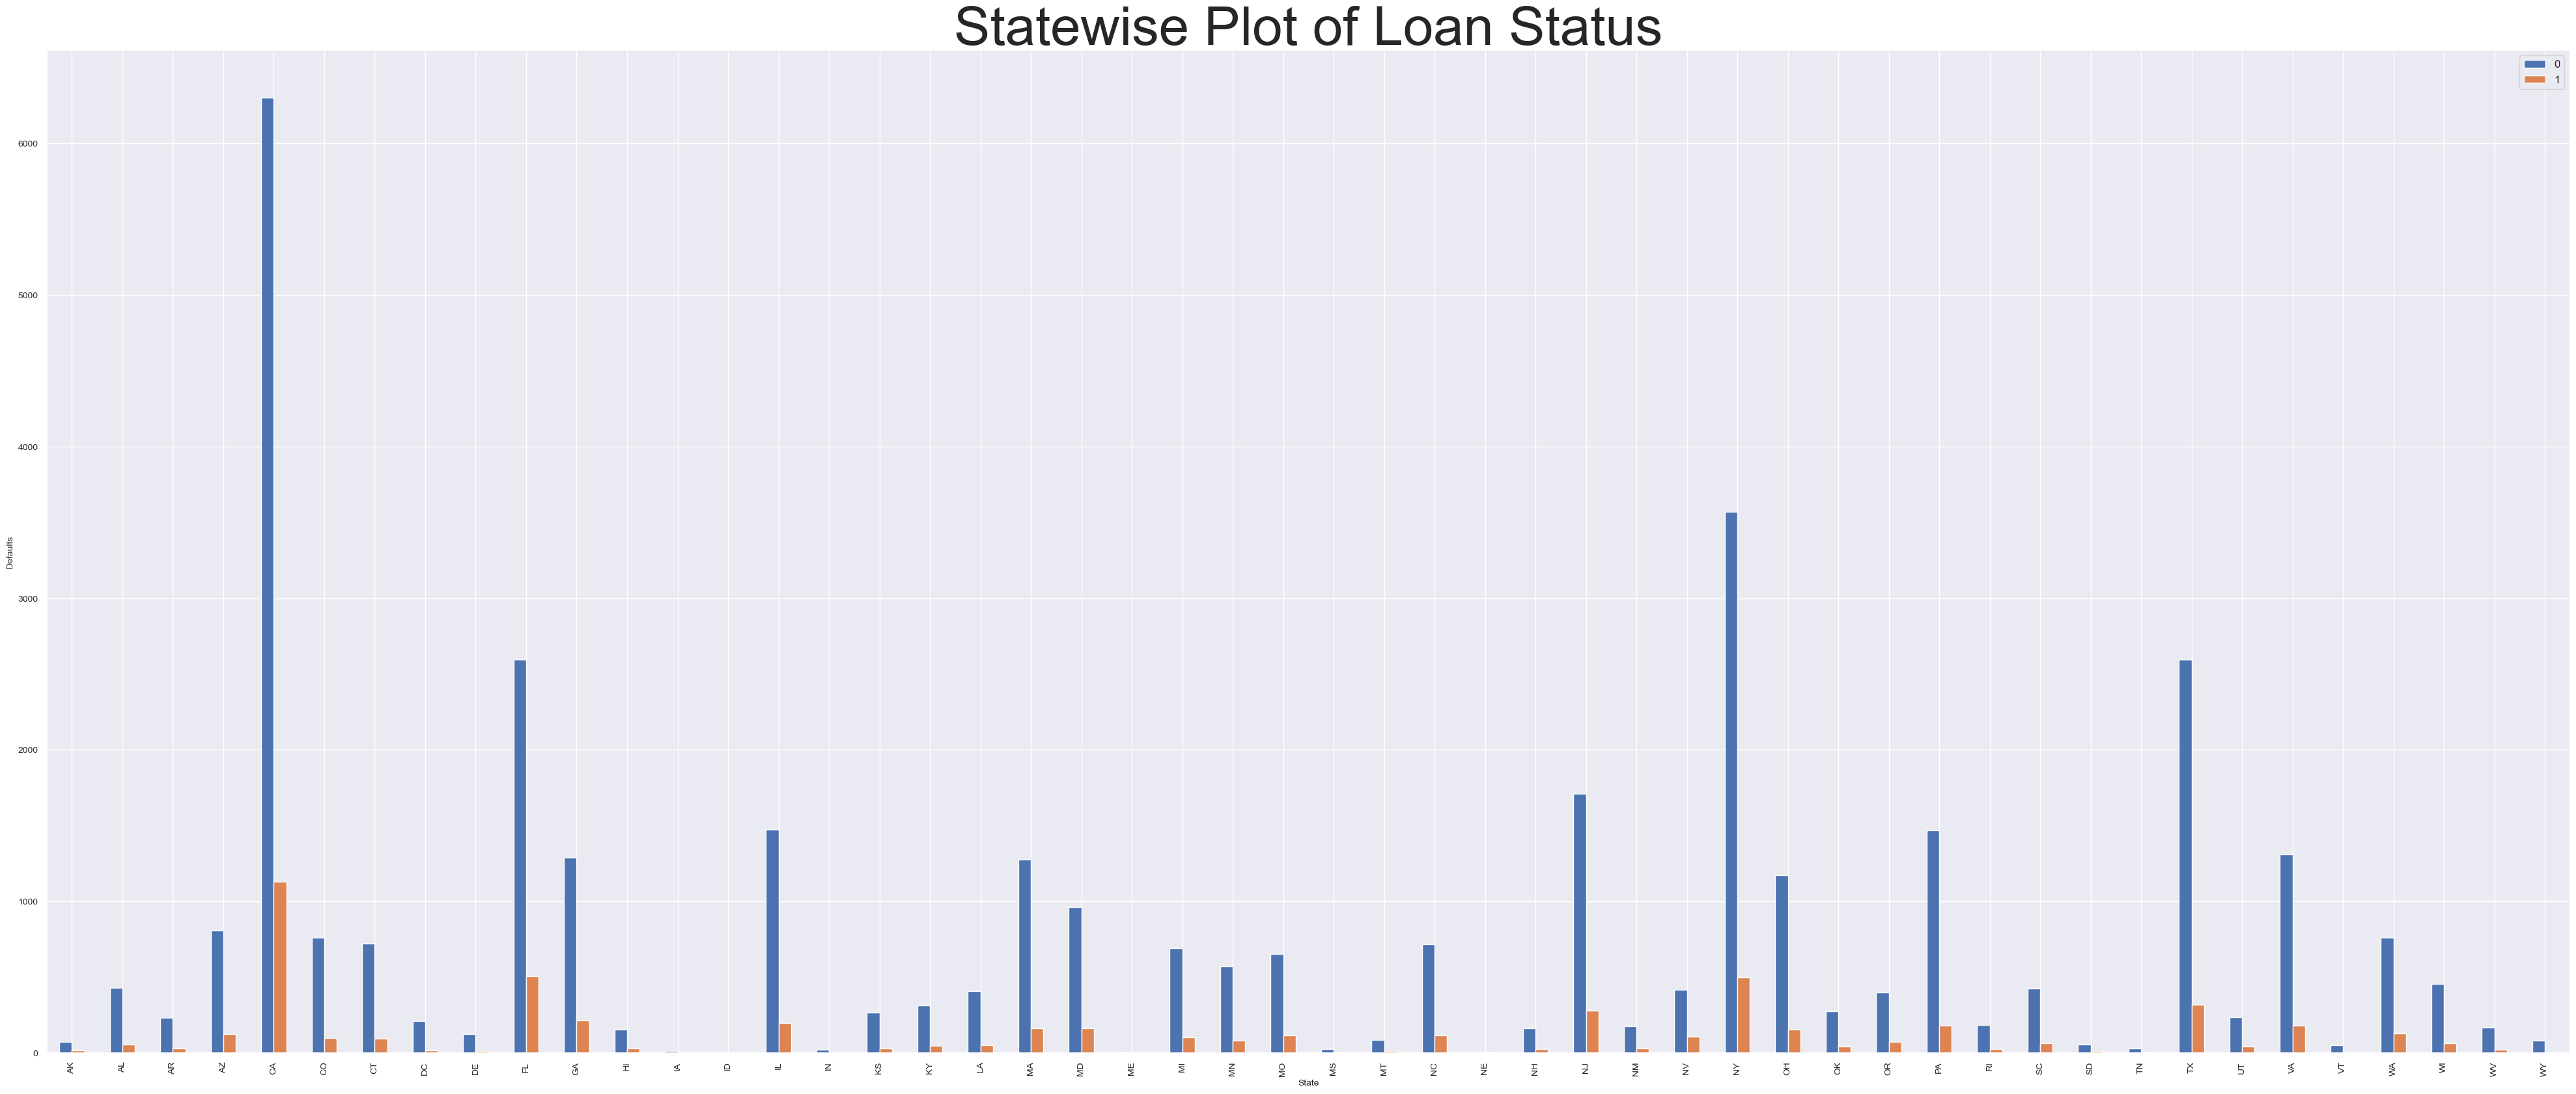

In [104]:
# Plot Relation between "loan_status" and "state"

pd.crosstab(loan.addr_state.str.upper(),loan.defaulted).plot(kind='bar', figsize=(50,20))
plt.title('Statewise Plot of Loan Status')
plt.xlabel('State', fontsize=10)
plt.ylabel('Defaults', fontsize=10)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: The default ratio is fairly proportional to the total in each State. 
# None of the individual States stand out as exception in default ratio. 

[Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')]

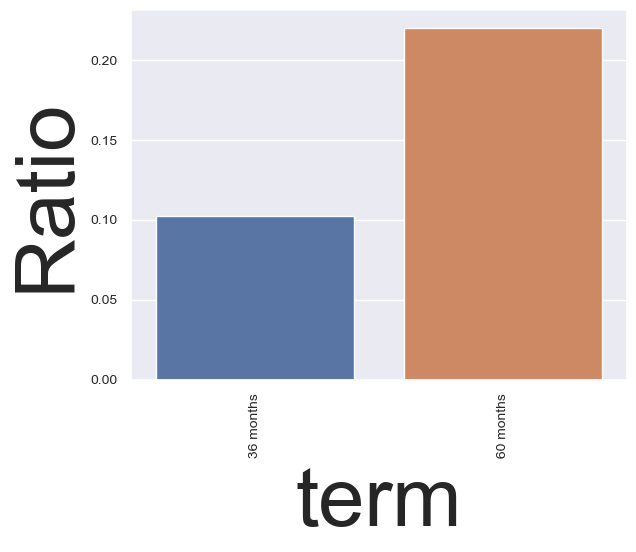

In [106]:
# Plot against Ratio of Default and Term

df_term = loan[loan.defaulted == 1].groupby(['term'])[['defaulted']].count().reset_index()
df_trmtot = loan.groupby(['term'])[['defaulted']].count().reset_index()
df_trmfull = pd.merge(df_term, df_trmtot, left_on='term', right_on='term', how='left')
df_trmfull['Ratio'] = df_trmfull.defaulted_x/df_trmfull.defaulted_y
ax = sns.barplot(x=df_trmfull.term, y=df_trmfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_trmfull.term, rotation=90)

# Observation: 60 month tenured loans have much higher default rate

### `Finding any corelation between employer and default ratio`

In [109]:
# List the companies from where the most number of defaulted individuals come from

loan.emp_title.value_counts().head(20)

emp_title
US Army                    139
Bank of America            115
IBM                         72
Kaiser Permanente           61
AT&T                        61
UPS                         58
Wells Fargo                 57
USAF                        56
US Air Force                55
Self Employed               49
United States Air Force     48
Walmart                     47
Lockheed Martin             46
State of California         45
Verizon Wireless            43
U.S. Army                   42
Walgreens                   41
USPS                        41
US ARMY                     40
Self                        39
Name: count, dtype: int64

In [111]:
# Find out Companywise Default ratio for companies occurring > 20 and highest ratio of Default 
# to find if there is any correlation to companies

loan.emp_title = loan.emp_title.str.upper()
employers = loan.groupby(['emp_title'])['defaulted'].count()
employers = employers.reset_index().sort_values('defaulted', ascending=False)
emp_defaults = loan.groupby(['emp_title'])['defaulted'].sum()
emp_defaults = emp_defaults.reset_index().sort_values('defaulted', ascending=False)
employers.rename(columns = {'defaulted': "Totals"}, inplace=True)
employers_f = pd.merge(employers, emp_defaults, left_on='emp_title', right_on='emp_title')
employers_f['Default_Ratio'] = round(employers_f.defaulted/employers_f.Totals*100, 4)
employers_f = employers_f.sort_values('Default_Ratio', ascending=False)
employers_f[employers_f.Totals > 20]

# Observation: Staff from some of the employers have high propensity of default. 

,emp_title,Totals,defaulted,Default_Ratio
50,WAL-MART,24,6,25.0000
9,UPS,69,17,24.6377
64,INTERNAL REVENUE SERVICE,21,5,23.8095
2,WALMART,84,20,23.8095
57,US BANK,22,5,22.7273
...,...,...,...,...
24,JPMORGAN CHASE,45,2,4.4444
48,COSTCO WHOLESALE,25,1,4.0000
56,TIME WARNER CABLE,23,0,0.0000
52,PRICEWATERHOUSECOOPERS,24,0,0.0000


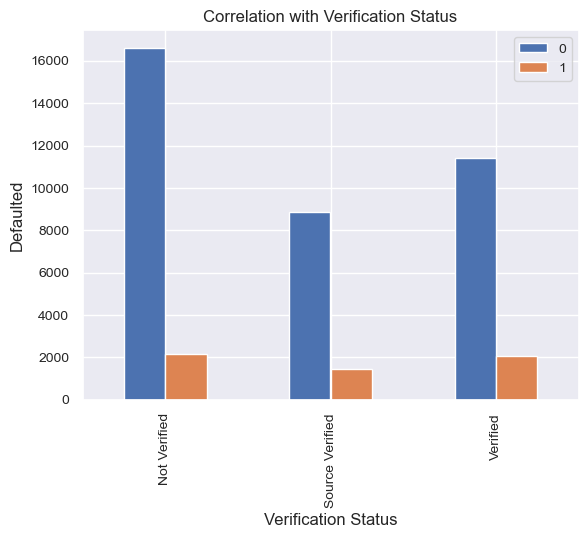

In [113]:
# Plot against Verification Status

pd.crosstab(loan.verification_status,loan.defaulted).plot(kind='bar')
plt.title('Correlation with Verification Status', fontsize=12)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)


# Observation: The default ratio is fairly proportional to the total in each Category of Verification Status. 
# None of the individual Verification Status stand out as exception in default ratio. 

In [115]:
temp = pd.crosstab(loan.verification_status,loan.defaulted)
temp['ratio'] = temp[1]/temp[0]*100
temp

# Observation: Stangely, 'Verified' loans have a higher default ratio 

defaulted,0,1,ratio
verification_status,,,
Not Verified,16614,2144,12.904779
Source Verified,8862,1444,16.294290
Verified,11406,2065,18.104506


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12'),
  Text(0, 0.14, '0.14'),
  Text(0, 0.16, '0.16'),
  Text(0, 0.18, '0.18')])

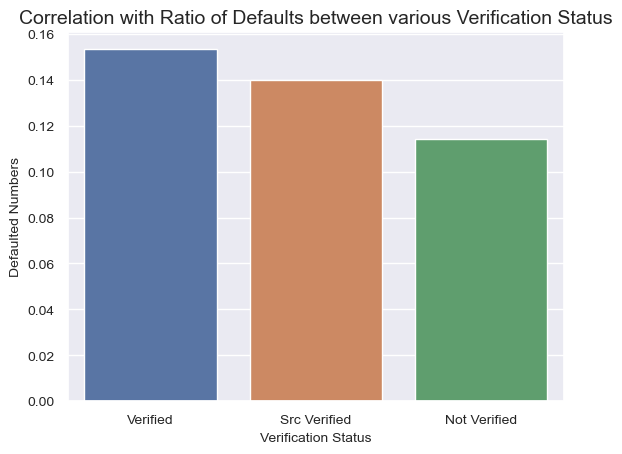

In [117]:
# Plot against Ratio of Default and Verification Status

loan_verified = loan[(loan.verification_status == 'Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Verified'].verification_status.count()
loan_srcverified = loan[(loan.verification_status == 'Source Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Source Verified'].verification_status.count()
loan_notverified = loan[(loan.verification_status == 'Not Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Not Verified'].verification_status.count()

ax = sns.barplot(x=['Verified', 'Src Verified', 'Not Verified'], y=[loan_verified, loan_srcverified, loan_notverified])
plt.title('Correlation with Ratio of Defaults between various Verification Status', fontsize=14)
plt.xlabel('Verification Status', fontsize=10)
plt.ylabel('Defaulted Numbers', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


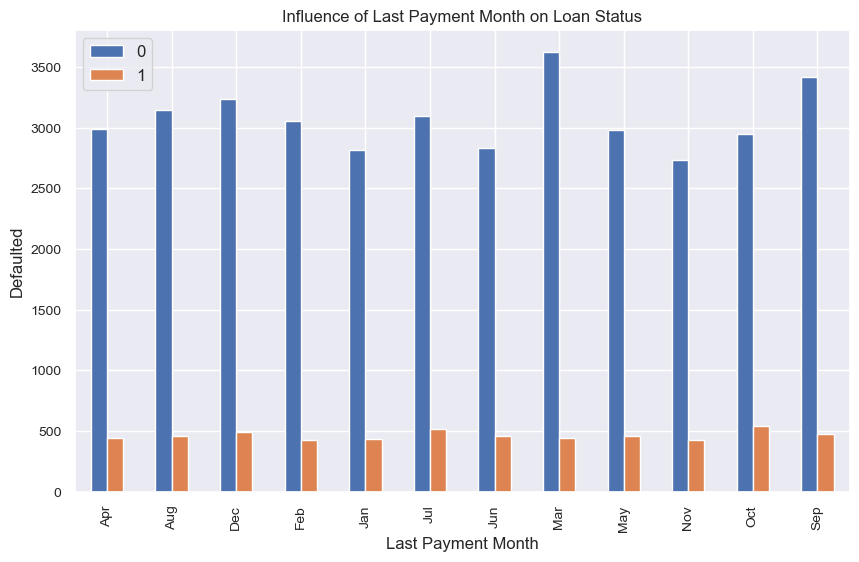

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the date format is Year-Month ('YYYY-MM')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%Y-%m')

loan['month_last_pymnt'] = loan['last_pymnt_d'].dt.strftime("%b")

# Plotting
pd.crosstab(loan.month_last_pymnt, loan.defaulted).plot(kind='bar', figsize=(10,6))
plt.title('Influence of Last Payment Month on Loan Status', fontsize=12)
plt.xlabel('Last Payment Month', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)
plt.show()


### `Correlation between Loan status and dti`

Text(0, 0.5, 'dti Ratio')

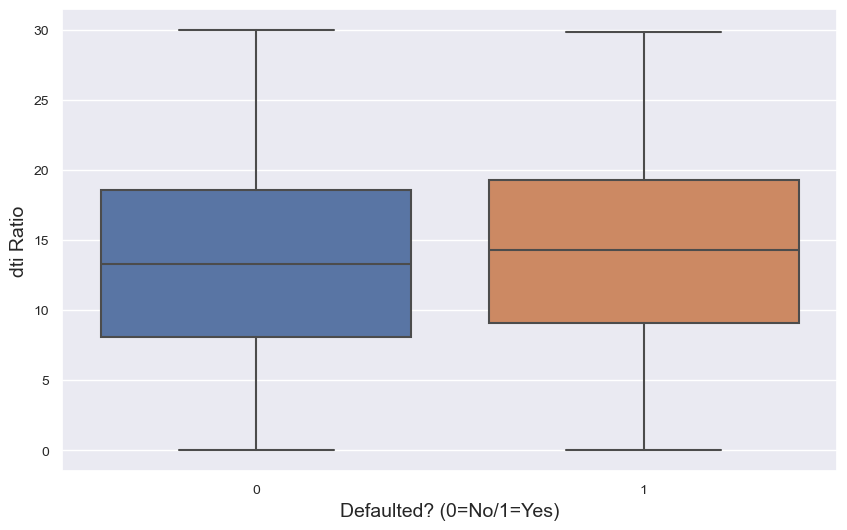

In [126]:
# Boxplot with dti [A ratio calculated using the borrower’s total monthly debt payments on total income]

ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="dti", data=loan)
ax.set_xlabel('Defaulted? (0=No/1=Yes)', fontsize=14) 
ax.set_ylabel('dti Ratio', fontsize=14)

# Observation: No real correlation between dti values between defaulted and non-default 

In [128]:
# Apply Binning on dti ratio ['0-8%', '8-16%', '16-24%', '24%+'']

loan['dtit'] = 0
loan['dti'] = loan['dti'].astype(int)
def bindti(dtip): 
    if dtip >= 0 and dtip < 8:
        return '0-8%'
    elif dtip >= 8 and dtip < 16:
        return '8-16%'
    elif dtip >= 16 and dtip < 24:
        return '16-24%'
    elif dtip >= 22:
        return '24%+'

loan['dtit'] = loan.dti.apply(bindti) 
loan['dtit']

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [130]:
import pandas as pd

# Assuming 'loan' is your DataFrame

# Check and handle non-finite values
print(loan['dti'].isnull().sum())
print(loan['dti'].describe())

# Fill NaN values or drop rows with NaN values
loan['dti'] = loan['dti'].fillna(0)  # or use loan = loan.dropna(subset=['dti'])

# Convert to integer
loan['dti'] = loan['dti'].astype(int)

# Define the binning function
def bindti(dtip):
    if dtip >= 0 and dtip < 8:
        return '0-8%'
    elif dtip >= 8 and dtip < 16:
        return '8-16%'
    elif dtip >= 16 and dtip < 24:
        return '16-24%'
    elif dtip >= 24:
        return '24%+'

# Apply the binning function
loan['dtit'] = loan['dti'].apply(bindti)

print(loan['dtit'])


3
count    42535.000000
mean        13.373043
std          6.726315
min          0.000000
25%          8.200000
50%         13.470000
75%         18.680000
max         29.990000
Name: dti, dtype: float64
0          24%+
1          0-8%
2         8-16%
3        16-24%
4        16-24%
          ...  
42533     8-16%
42534      0-8%
42535     8-16%
42536      0-8%
42537      0-8%
Name: dtit, Length: 42538, dtype: object


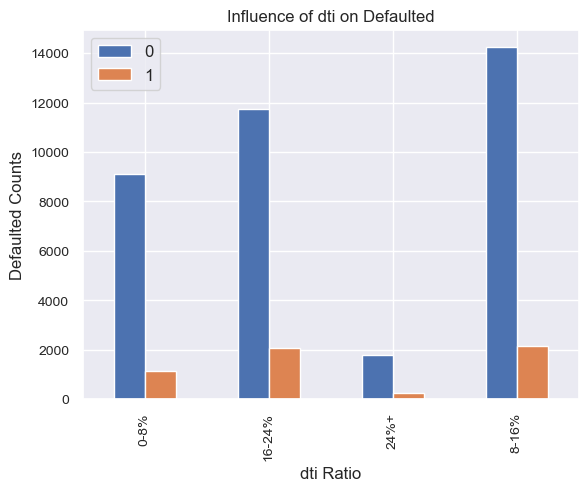

In [132]:
# Correlation between dti ratio and Defaulted after Binning 

%matplotlib inline
pd.crosstab(loan.dtit,loan.defaulted).plot(kind='bar')
plt.title('Influence of dti on Defaulted', fontsize=12)
plt.xlabel('dti Ratio', fontsize=12)
plt.ylabel('Defaulted Counts', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

Text(0, 0.5, 'Ratio')

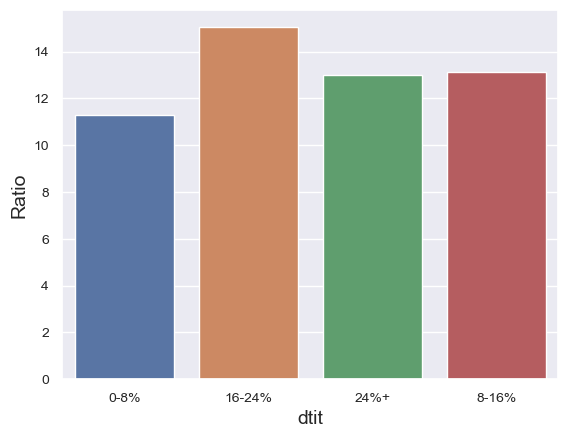

In [134]:
# Plot against Ratio of Default and dti

dtidef = loan[loan.defaulted == 1].groupby(['dtit'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['dtit'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='dtit', right_on='dtit', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y*100
ax = sns.barplot(x=dtifull.dtit, y=dtifull.Ratio)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('dtit', fontsize=14)
plt.ylabel('Ratio', fontsize=14)

# Observation: >15% default ratio for 'dti ratio of 16-24%' - highest 

### `Influence on default by tenure of employment`

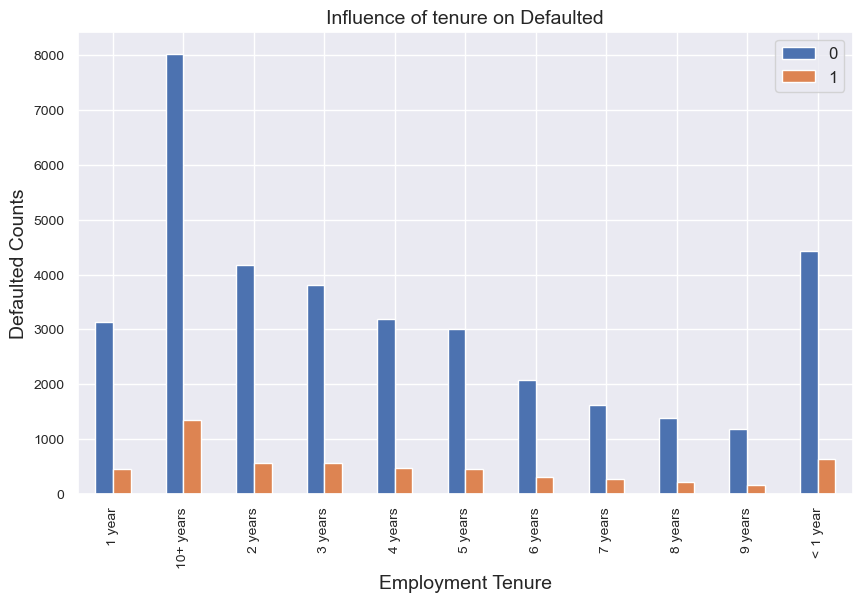

In [137]:
# Influence of length of employment

%matplotlib inline
pd.crosstab(loan.emp_length,loan.defaulted).plot(kind='bar', figsize=(10,6))
plt.title('Influence of tenure on Defaulted', fontsize=14)
plt.xlabel('Employment Tenure', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(fontsize=12)

# Observation: No real exception observed

In [139]:
ct = pd.crosstab(loan.emp_length,loan.defaulted)
ct['ratio'] = ct[1]/ct[0]*100
ct

defaulted,0,1,ratio
emp_length,,,
1 year,3137,458,14.599936
10+ years,8029,1340,16.689501
2 years,4174,569,13.632008
3 years,3807,557,14.630943
4 years,3184,465,14.604271
5 years,2999,459,15.305102
6 years,2067,308,14.900822
7 years,1612,263,16.315136
8 years,1386,206,14.862915


Can apply binning on length of employment to find out category-wise default ratio

Text(0, 0.5, 'Ratio')

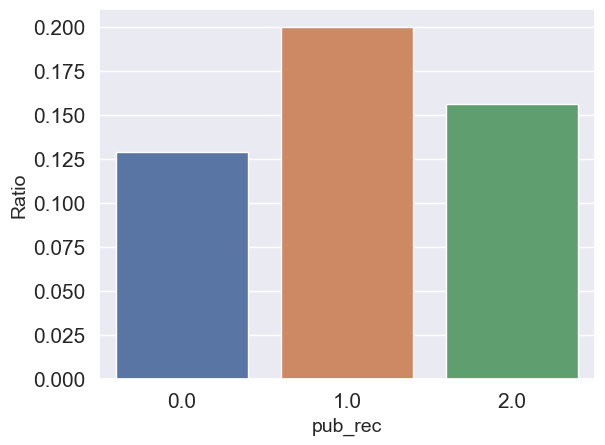

In [142]:
# Plot against Ratio of Default and pub_rec

df_pr = loan[loan.defaulted == 1].groupby(['pub_rec'])[['defaulted']].count().reset_index()
df_prtot = loan.groupby(['pub_rec'])[['defaulted']].count().reset_index()
df_prfull = pd.merge(df_pr, df_prtot, left_on='pub_rec', right_on='pub_rec', how='left')
df_prfull['Ratio'] = df_prfull.defaulted_x/df_prfull.defaulted_y
ax = sns.barplot(x=df_prfull.pub_rec, y=df_prfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_prfull.pub_rec)
plt.xlabel('pub_rec', fontsize=14)
plt.ylabel('Ratio', fontsize=14)

[Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')]

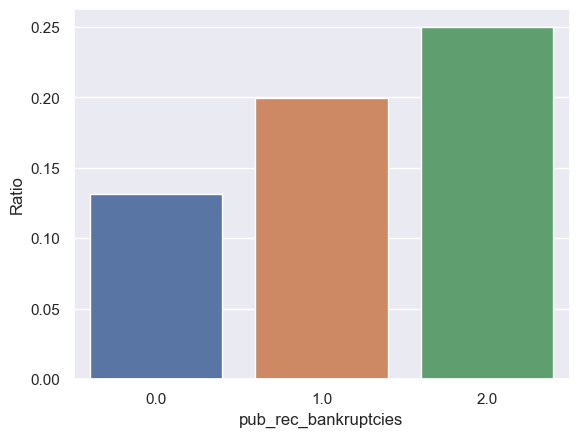

In [144]:
# Plot against Ratio of Default and pub_rec_bankruptcies

df_prb = loan[loan.defaulted == 1].groupby(['pub_rec_bankruptcies'])[['defaulted']].count().reset_index()
df_prbtot = loan.groupby(['pub_rec_bankruptcies'])[['defaulted']].count().reset_index()
df_prbfull = pd.merge(df_prb, df_prbtot, left_on='pub_rec_bankruptcies', right_on='pub_rec_bankruptcies', how='left')
df_prbfull['Ratio'] = df_prbfull.defaulted_x/df_prbfull.defaulted_y
ax = sns.barplot(x=df_prbfull.pub_rec_bankruptcies, y=df_prbfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_prbfull.pub_rec_bankruptcies)

# Observations: Bowrrowers with pub_rec_bankruptcies value 2 have a much higher propensity to default

In [146]:
# Apply Binning on total_acc ['0-20', '20-40', '40-60', '60+'']

loan['tacc'] = 0
loan['total_acc'] = loan['total_acc'].astype(int)
def bintacc(ptacc): 
    if ptacc >= 0 and ptacc < 20:
        return '0-20'
    elif ptacc >= 20 and ptacc < 40:
        return '20-40'
    elif ptacc >= 40 and ptacc < 60:
        return '40-60'
    elif ptacc >= 60:
        return '60+'

loan['tacc'] = loan.total_acc.apply(bintacc) 
loan['tacc']

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [148]:
import pandas as pd

# Assuming 'loan' is your DataFrame

# Check and handle non-finite values
print(loan['total_acc'].isnull().sum())
print(loan['total_acc'].describe())

# Fill NaN values or drop rows with NaN values
loan['total_acc'] = loan['total_acc'].fillna(0)  # or use loan = loan.dropna(subset=['total_acc'])

# Convert to integer
loan['total_acc'] = loan['total_acc'].astype(int)

# Define the binning function
def bintacc(ptacc):
    if ptacc >= 0 and ptacc < 20:
        return '0-20'
    elif ptacc >= 20 and ptacc < 40:
        return '20-40'
    elif ptacc >= 40 and ptacc < 60:
        return '40-60'
    elif ptacc >= 60:
        return '60+'

# Apply the binning function
loan['tacc'] = loan['total_acc'].apply(bintacc)

print(loan['tacc'])


32
count    42506.000000
mean        22.124406
std         11.592811
min          1.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64
0         0-20
1         0-20
2         0-20
3        20-40
4        20-40
         ...  
42533     0-20
42534     0-20
42535     0-20
42536     0-20
42537     0-20
Name: tacc, Length: 42538, dtype: object


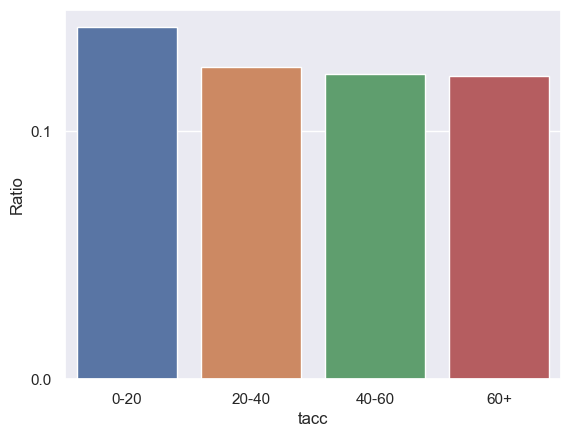

In [150]:
# Plot against Ratio of Default and total_acc (total number of credit lines)

tacc = loan[loan.defaulted == 1].groupby(['tacc'])[['defaulted']].count().reset_index()
tactot = loan.groupby(['tacc'])[['defaulted']].count().reset_index()
tacfull = pd.merge(tacc, tactot, left_on='tacc', right_on='tacc', how='left')
tacfull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
tacfull['Ratio'] = tacfull.defaulted_x/tacfull.defaulted_y
tacfull
ax = sns.barplot(x=tacfull.tacc, y=tacfull.Ratio)
sns.set(font_scale = 5)

In [152]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']*100
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),Total,Chargedoff_Proportion
11,small_business,476.0,34.0,0.0,72.0,89.0,1320.0,0.0,0.0,1.0,1830.0,26.010929
10,renewable_energy,19.0,0.0,0.0,1.0,2.0,84.0,0.0,0.0,0.0,103.0,18.446602
3,educational,56.0,0.0,0.0,32.0,65.0,269.0,0.0,0.0,0.0,325.0,17.230769
9,other,635.0,61.0,0.0,121.0,303.0,3302.0,1.0,1.0,1.0,3998.0,15.882941
8,moving,92.0,1.0,0.0,15.0,31.0,490.0,0.0,0.0,0.0,583.0,15.780446
5,house,59.0,9.0,0.0,11.0,33.0,313.0,1.0,0.0,0.0,381.0,15.485564
7,medical,106.0,5.0,0.0,22.0,36.0,584.0,0.0,0.0,0.0,695.0,15.251799
2,debt_consolidation,2785.0,285.0,0.0,292.0,808.0,15585.0,13.0,2.0,6.0,18655.0,14.928973
12,vacation,53.0,2.0,0.0,6.0,13.0,325.0,0.0,1.0,0.0,380.0,13.947368
4,home_improvement,349.0,32.0,0.0,71.0,143.0,2600.0,1.0,1.0,2.0,2981.0,11.707481


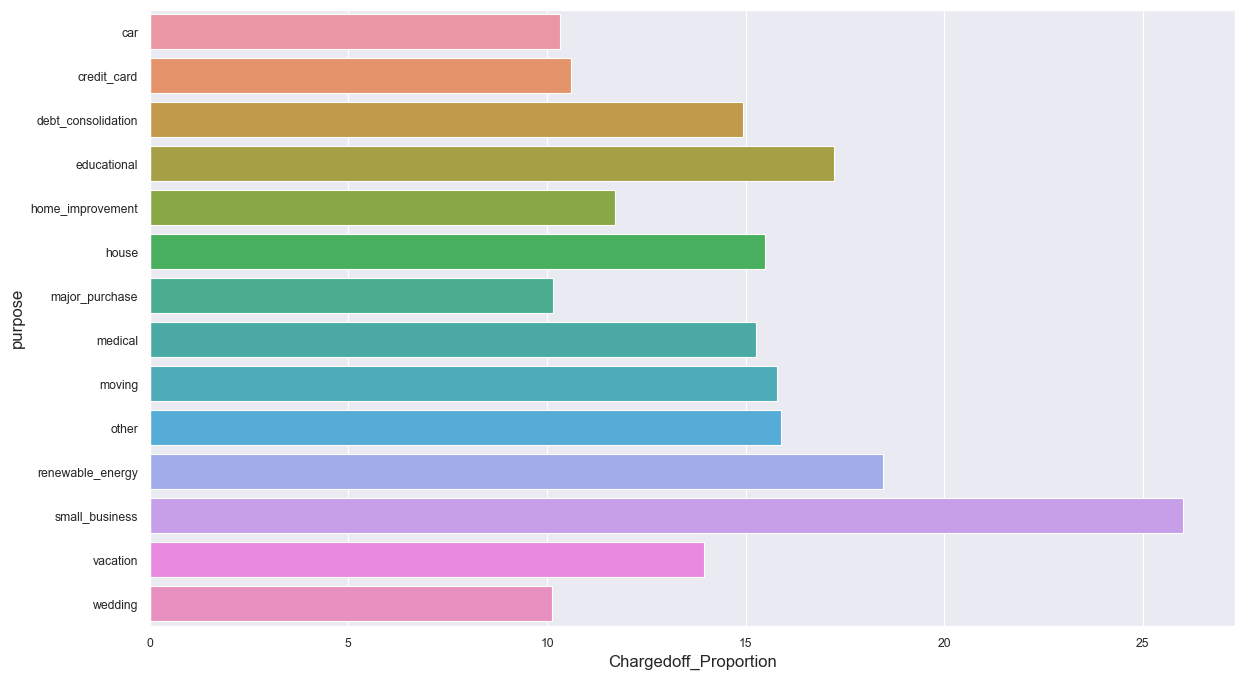

In [154]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

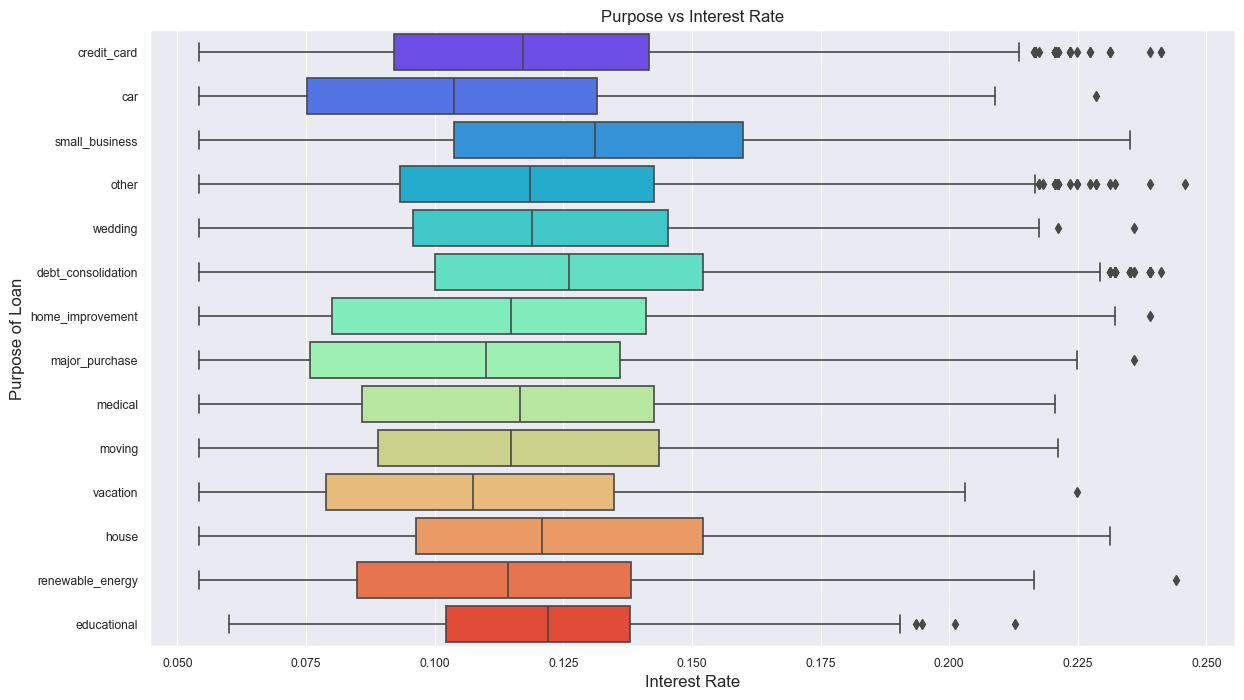

In [156]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate_num', y='purpose', data =loan, palette='rainbow')
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.
# Both of these features have many outlier on the upper end that may lead to default. 

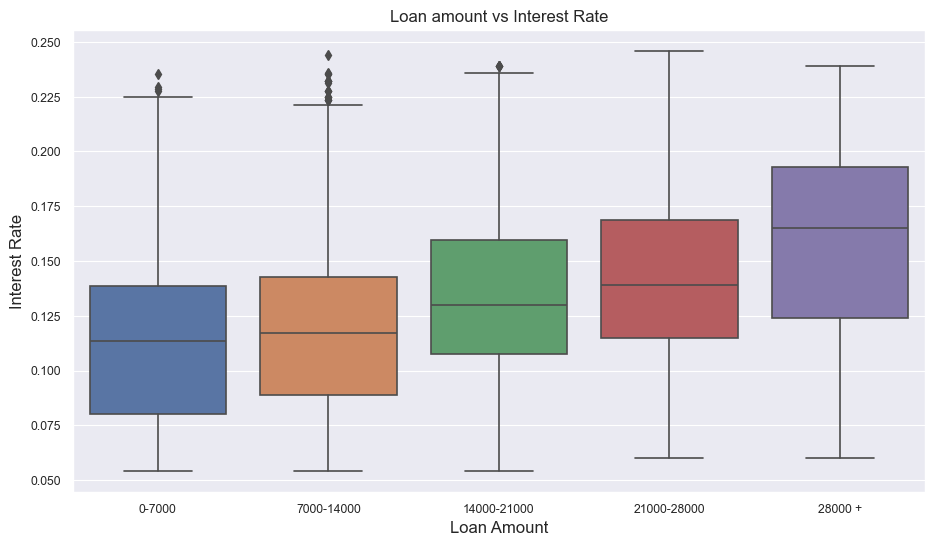

In [158]:
# Understand relationship between Loan Amount vs Interest Rate

# Create a loan amount category field with various brackets

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], 
                                labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(11,6))
ax = sns.boxplot(y='int_rate_num', x='loan_amnt_cats', data=loan)
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

# Observations: Higher the loan_amount, higher the interest rate.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

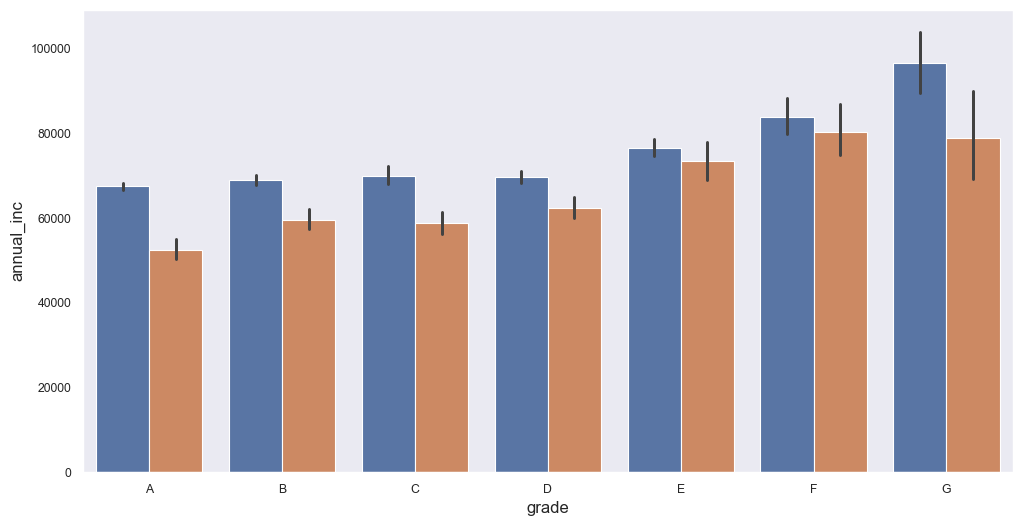

In [160]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(12,6))
sns.set_style("dark")
ax=sns.barplot(x='grade', y='annual_inc', hue="defaulted", data=loan, estimator=np.mean, order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.legend()
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have much lower average annual incomes

AttributeError: 'int' object has no attribute 'startswith'

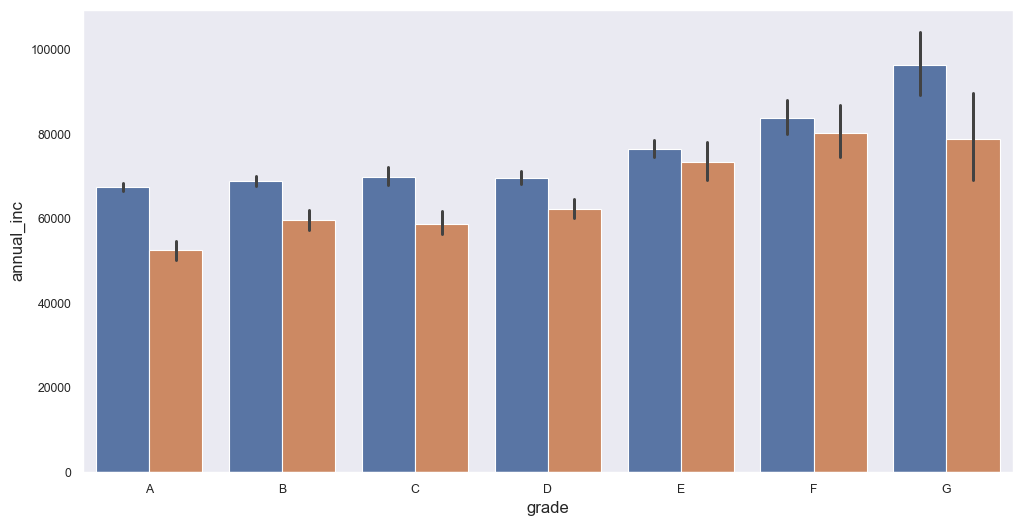

In [162]:
loan['defaulted'] = loan['defaulted'].astype('category')
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set context and style for the plot
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
plt.figure(figsize=(12,6))
sns.set_style("dark")

# Ensure 'defaulted' is treated as a categorical variable
loan['defaulted'] = loan['defaulted'].astype('category')

# Plot the barplot with the correct order list
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
ax = sns.barplot(x='grade', y='annual_inc', hue='defaulted', data=loan, estimator=np.mean, order=order)

# Set titles and labels
ax.set_title('Grade vs Annual Income')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Grades')

# Show the legend
plt.legend(title='Defaulted')

# Display the plot
plt.show()
print(loan['grade'].unique())
print(loan['defaulted'].unique())


### `Find out Correlation between Interest Rate and Default`

In [63]:
# Apply Binning on interest amount ['0-8%', '8-13%', '13-18%, '18%+']

loan['int_ratet'] = 0
loan['int_rate'] = loan['int_rate'].str.replace('\%', '')
loan['int_rate'] = loan['int_rate'].astype(float)
def bininst(tinrst): 
    if tinrst >= 0 and tinrst < 8:
        return '0-8%'
    elif tinrst >= 8 and tinrst < 13:
        return '8-13%'
    elif tinrst >= 13 and tinrst < 18:
        return '13-18%'
    elif tinrst >= 18:
        return '18%+'

loan['int_ratet'] = loan.int_rate.apply(bininst) 
loan['int_ratet']

0         8-13%
1        13-18%
2        13-18%
3        13-18%
4         8-13%
          ...  
39712     8-13%
39713     8-13%
39714     8-13%
39715      0-8%
39716    13-18%
Name: int_ratet, Length: 39717, dtype: object

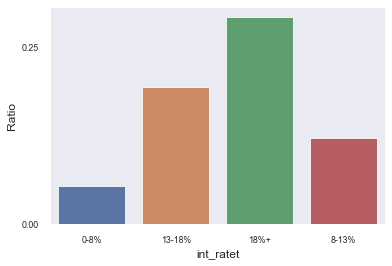

In [64]:
# Plot against Ratio of Default and Interest Amount

dtidef = loan[loan.defaulted == 1].groupby(['int_ratet'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['int_ratet'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='int_ratet', right_on='int_ratet', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y
dtifull
ax = sns.barplot(x=dtifull.int_ratet, y=dtifull.Ratio)
sns.set(font_scale = 11)

# Observation: Default ration for loans with interest of 18% and higher of markedly high

<p style="background-color:Orange;">We have completed our Exploratory Data Analysis process on the Lending Club Data. There are a number of Observations that we have come up with which we would like to present to the management of Lending Club to place due consideration on their products and customer segmentation approaches that would reduce Default rate.</p>

## `Observations:`

- `Plotting the Annual Incomes`: Took a 99% cut of Annual Income that removed high outliers and shows a meaningful comparison. It does show a tendency towards more Defaults by people having lesser incomes. Annual Income do have a degree of -ve correlation with Default rate. 0-30K income bracket show a significantly high Default rate. Default rate of people in income bracket of 0-30K taking loans >20K is extremely high - ~50%. Even, Default rate of people in income bracket of 0-30K taking loans 10K-20K is high - ~25%. These combinations must be removed. 

- `Grade/Sub-Grade`: Products with certain grade/sub-grade combinations lead to high to very high Defaults and should be looked at. 

- `State`: Applicants from Nebraska have very High Default Ratio – 60% but in a very small population. Alaska and South Dakota observe moderately high Default ratio - ~18%. 

- `Purpose`: “Small Business” purpose loans tend to show a very high Default trend. Other than that, Renewable Energy loans have a moderately high default rate. Avoid requests with these types. 

- `Funded Amount` has a +ve correlation with Defaulted. Loans > 20K have significantly higher Default rate than 0-10K. Instalment Amount has a small +ve correlation with Defaulted. 

- `Interest Rate Amount` has a very high +ve correlation with Defaulted. Loans with 18% and higher rates show a much higher default rate. Consider lower rate loans more. 

- From the Plotting of `dti Ratio`, there is a upward trend of Defaults as the dti ratio goes higher. Focusing on Customers with Lower dti Ratios is better for bringing down Default Ratio. 

- `Pub_rec_bankruptcies`: High +ve correlation of Default to number of pub_rec_bankruptcies. Avoid customers with any Bankruptcy record. 

- `Pub_rec`: Customers with any derogatory public record has more propensity to default. Avoid customers with any Derogatory record. 

- `Term`: 60 months tenured loans show a much higher default rate. Avoid lower tenured loans. 

- `Emp_title`: (company name): Slide 25 - An analysis is carried out to find out companies from which > 20 employees have taken Credit from Lending club and has high Default Rate. These companies are worth being careful about. 

